## Project Titanic - machine learning from disaster.

##### It is your job to predict if a passenger survived the sinking of the Titanic or not.
##### For each in the test set, you must predict a 0 or 1 value for the variable.

- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- parch	# of parents / children aboard the Titanic
- sibsp: sibling: brother... and spouse: wife, husband
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [53]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
train_df= pd.read_csv("./data/train.csv", index_col= "PassengerId")
test_df= pd.read_csv("./data/test.csv", index_col= "PassengerId")

In [55]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train_df.columns, test_df.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

### Remove PassengerId - same row index

In [57]:
# train_df.set_index(train_df.PassengerId, inplace= True)


In [58]:
# train_df.drop("PassengerId", axis= 1, inplace= True)RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR

## Information data


In [59]:
train_df.shape , test_df.shape


((891, 11), (418, 10))

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## id PassengerID

In [61]:
test_df.tail(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 1. Feature classification: Categorical and numerical

* this helps us select the appropriate plots for visualization
### categorical
* Rời rạc -không đo lường được bằng các giá trị số
* example: gender, colors, typeof pro, country...
- cate: nominal, ordinal, ratio, interval

### Numerical 
* liên tục - int, float.. 
* height, temperature, prices, times..
* age, fare

- numerical: discrete, continuous and timeseries


In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [64]:
print(train_df.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [65]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### TakeNote
- cate: survived, sex, embarked, pclass (ordinal), sibsp, parch
- numer: age, fare, 
- mix: ticket, cabin
- contain error: name
- blank or null: cabin > age >embarked


In [66]:
#covert int -> categorical
# survived: int -> cate
train_df['Survived']= train_df['Survived'].astype("category")


In [67]:
train_df['Survived'].dtype 

CategoricalDtype(categories=[0, 1], ordered=False)

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


#### Covert feature to category

In [69]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
#function to convert
def covert_cate(df, features):
    for fe in features:
        df[fe] = df[fe].astype("category") # df.Pclass, df."Pclass" =>df["Pclass"]

covert_cate(train_df, features)
covert_cate(test_df, features)

In [70]:
print(train_df.info())
print("\n")
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3  

### Distribution of numerical feature values across the samples.

In [71]:
train_df.describe() # about numerical # return ve tk number - roi rac
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### Distribution of Categorical features.

In [72]:
train_df.describe(include= ["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# 3.Exploratory Data analysis
#### 3.1 Correlating cate:
* cate: survived, sex, embarked, pclass, sibsp, parch

#### Target: Survived


In [73]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [74]:
train_df['Survived'].value_counts(normalize= True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


only 38% survived.. 61% died
#### Sex


In [75]:
print(train_df['Survived'].value_counts().to_frame())
print(train_df['Survived'].value_counts(normalize= True).to_frame())

          count
Survived       
0           549
1           342
          proportion
Survived            
0           0.616162
1           0.383838


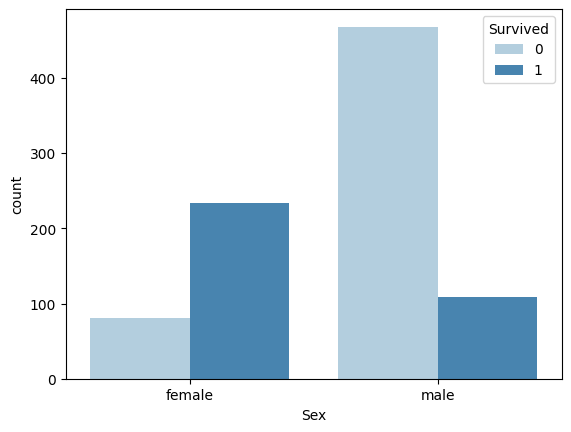

In [76]:

sns.countplot(data= train_df, x= "Sex", hue= "Survived", palette= "Blues");

* Remaining cate feature columns

### Visualization 5 columns

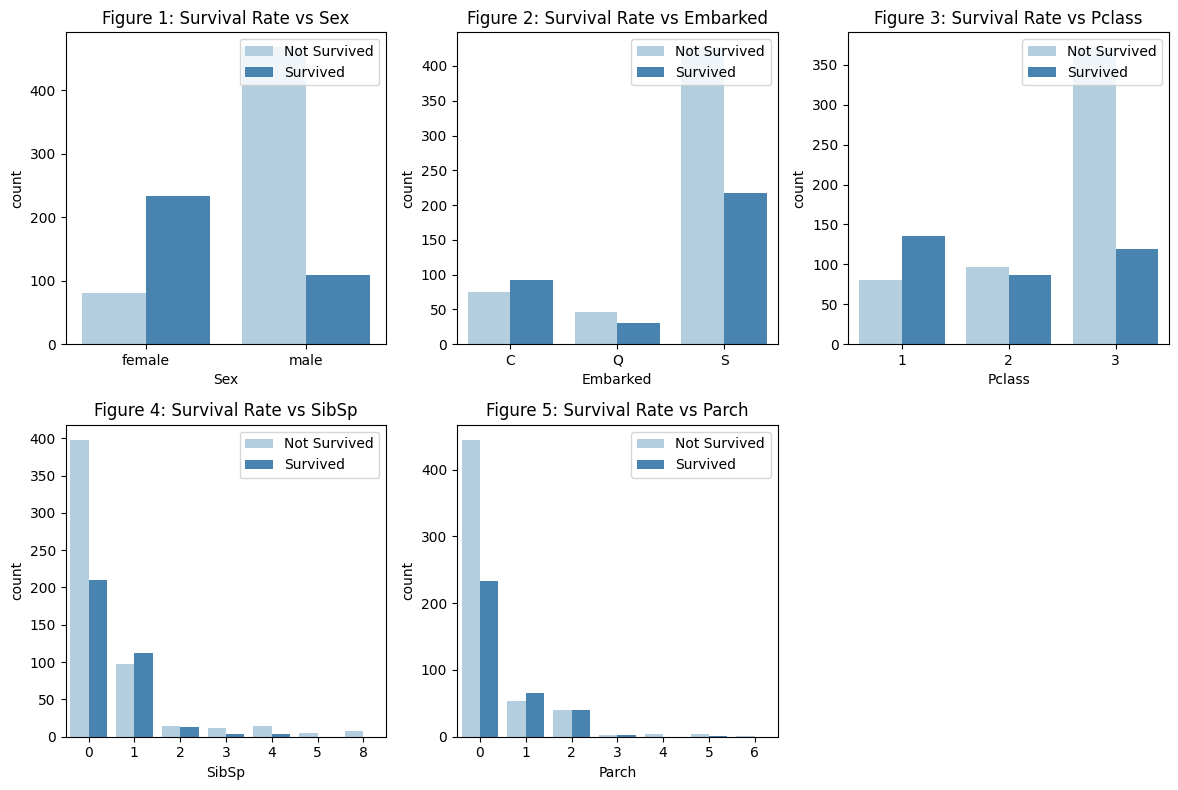

In [77]:
cols= ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize= (n_cols* 4, n_rows* 4))

## visualization
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c    #index to loop through list 'cols'
        if i < len(cols):
            ax_i= ax[r, c]  #create layout.
            sns.countplot(train_df, ax= ax_i, x= cols[i], hue= "Survived", palette= "Blues")
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title= '', loc= 'upper right', labels= ['Not Survived', 'Survived'])
            

plt.tight_layout() #word not ghi de len nhau
ax.flat[-1].set_visible(False) #remove the last subplot
plt.show()

### Observation:
* Survival Rate:
    - Fig1: Female survive > male
    - Fig2: most people from south.. and also had the heighest people not sur
    - Fig3: 1st higher survival
    - Fig4: people not sibling are mostly not survived... 1,2 better
    - Fig5: people with 0 parch are not sur

- Gôm lại fig4 và fig 5 khá giống
# 3.2 EDA for numerical features.
* num: Age, fare

#### Age

<Axes: xlabel='Age', ylabel='Count'>

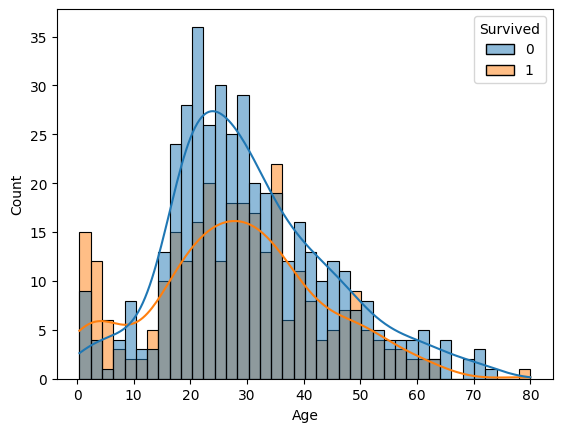

In [78]:
sns.histplot(data= train_df, x= 'Age', hue= 'Survived', bins= 40, kde= True)

#### Fare

In [79]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Count'>

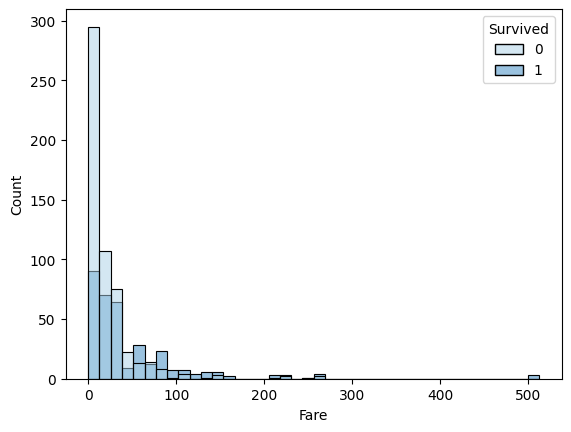

In [80]:
sns.histplot(data= train_df, x= 'Fare', hue= 'Survived', bins= 40, palette= 'Blues')

## Feature Engineeering && Data Wrangling
### divided 4 period - 0-25, 25-50, 50-75....

<Axes: xlabel='Fare', ylabel='count'>

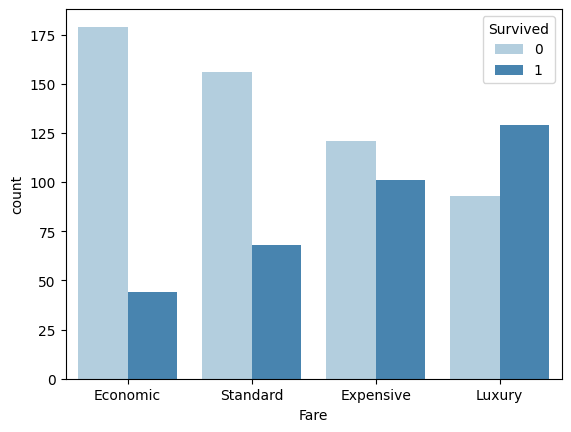

In [81]:
fare_cate = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels= fare_cate)
# quartile_data.dtype
sns.countplot(x= quartile_data, hue= train_df['Survived'], palette= 'Blues')

### 4. Feature Engineering && Data Wrangling
#### Name
- regular expression


In [82]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

#### Regular expressions

In [83]:
##extract_tile: mr, rev.. co chu vu
# https://regex101.com/
import re
def extract_title(name):
    p = re.compile(r", ([\w\s]+)\.")
    # if(p.search(name) is None): #debug
    #     print(name)
    return p.search(name).groups(1)[0].strip()

train_df['Title']= train_df['Name'].apply(lambda name: extract_title(name))
# train_df['Name'].apply(lambda name: extract_title(name))

In [84]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [85]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))


In [86]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

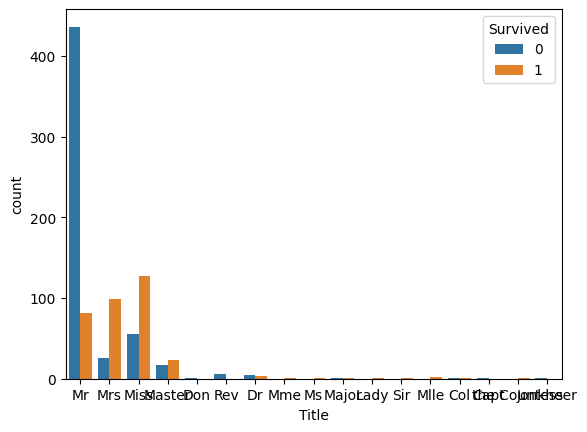

In [87]:
## difficult to see so we group by
sns.countplot(data= train_df, x= 'Title', hue= 'Survived')

### group by [mr, mrs, miss master] with other
- others is very little.

In [88]:
#function
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
    
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [89]:
print(f"{train_df['Title'].value_counts()} \n")
print(f"{test_df['Title'].value_counts()} \n")

Title
Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: count, dtype: int64 

Title
Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: count, dtype: int64 



<Axes: xlabel='Title', ylabel='count'>

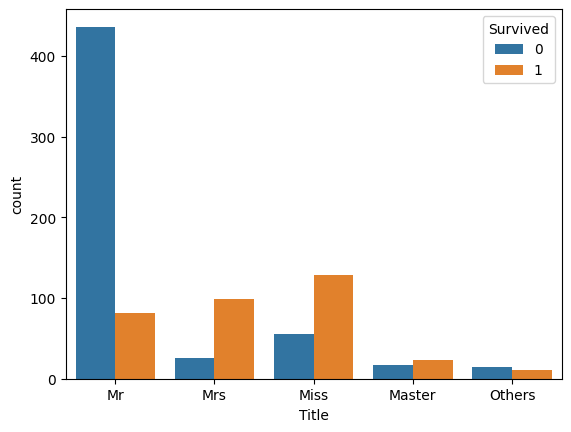

In [90]:
sns.countplot(data= train_df, x= 'Title', hue= 'Survived')

# Family
- 'SibSp', 'Parch'

In [91]:
train_df['Family_Size']= train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

train_df['Family_Size']

PassengerId
1      2
2      2
3      1
4      2
5      1
      ..
887    1
888    1
889    4
890    1
891    1
Name: Family_Size, Length: 891, dtype: int32

In [92]:
test_df['Family_Size']= test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [93]:
test_df['Family_Size']

PassengerId
892     1
893     2
894     1
895     1
896     3
       ..
1305    1
1306    1
1307    1
1308    1
1309    3
Name: Family_Size, Length: 418, dtype: int32

<Axes: xlabel='Family_Size', ylabel='count'>

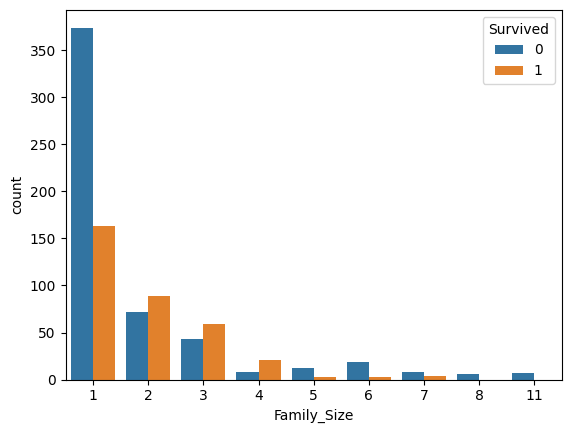

In [94]:
sns.countplot(data= train_df, x= 'Family_Size', hue= 'Survived') ## difficult to see...- divide 4 group
# Solo, Small, Medium, Large

#### Divided 4 groups
- Solo, Small, Medium, Large


In [95]:
train_df['Family_cate']= pd.cut(train_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])
test_df['Family_cate']= pd.cut(test_df['Family_Size'], bins=[0,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])

# bin operate: (0, 1]...(1,4]...(4,6]...(6,20]

In [96]:
test_df['Family_cate']

PassengerId
892      Solo
893     Small
894      Solo
895      Solo
896     Small
        ...  
1305     Solo
1306     Solo
1307     Solo
1308     Solo
1309    Small
Name: Family_cate, Length: 418, dtype: category
Categories (4, object): ['Solo' < 'Small' < 'Medium' < 'Large']

In [97]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Title', 'Family_Size', 'Family_cate'],
      dtype='object')

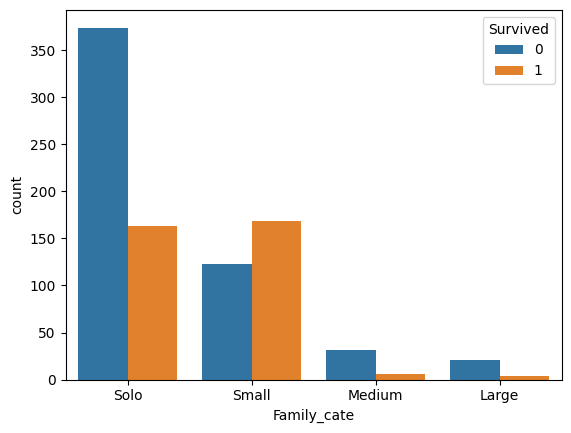

In [98]:
sns.countplot(data= train_df, x= 'Family_cate', hue= 'Survived');

## 4.2 Data Wrangling

In [99]:
num_features = ['Age', 'Fare']
cate_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_cate']

features_cols = num_features + cate_features
print(features_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cate']


In [100]:
def display_missing(df, features_cols):
    n_rows = df.shape[0]
    for col in features_cols:
        missing_count =  df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col}: {missing_count}--account for: {missing_count * 100/n_rows: .2f}%")
#call func
display_missing(train_df, features_cols)
print("\n")
display_missing(test_df, features_cols)

Col Age: 177--account for:  19.87%
Col Embarked: 2--account for:  0.22%


Col Age: 86--account for:  20.57%
Col Fare: 1--account for:  0.24%


### Filling missing values

#### Age
- filling missing values median of whole dataset.

In [101]:
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass']).median()['Age'];

In [102]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

### Filling the missing in Age with the medians of Sex and Pclass group

In [103]:
#Filling the missing in Age with the medians of Sex and Pclass group
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


TypeError: incompatible index of inserted column with frame index

In [ ]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

C:\Users\Admin\AppData\Local\Temp\ipykernel_137568\397400980.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))


In [ ]:
display_missing(train_df, features_cols)
display_missing(test_df, features_cols)

Col Embarked: 2--account for:  0.22%
Col Fare: 1--account for:  0.24%


- num_features = ['Age', 'Fare']
- cate_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_cate']

- features_cols = num_features + cate_features

In [ ]:
X = train_df[features_cols]
y = train_df['Survived']

In [ ]:
X_test = test_df[features_cols]

### Preprocess pipeline

In [ ]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline


- Gom 2 steps: 

In [ ]:
#numerical
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')), #fill value misssing by median
    ('scaler', StandardScaler())
])
#catelogical
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'most_frequent')), 
    ('scaler', OneHotEncoder(handle_unknown= 'ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[ #
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cate_features)
])

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cate'])])

In [ ]:
X = preprocessor.transform(X)

In [ ]:
X_test = preprocessor.transform(X_test)

## 5. Model Training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size= 0.2)

In [ ]:
X_train.shape, X_val.shape

((712, 19), (179, 19))

In [ ]:
X_test.shape

(418, 19)

### Binary classification
- logistic regression - usually để phân loại 

In [ ]:
# binary classification
from sklearn.preprocessing import PolynomialFeatures

# sklearn model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier 


In [ ]:
log_reg = LogisticRegression(solver= 'liblinear', max_iter= 1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
log_reg.score(X_val, y_val)

0.8379888268156425

In [ ]:
y_pred = log_reg.predict(X_val)

In [ ]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.78125, 0.7692307692307693)

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       114
           1       0.78      0.77      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



- y = a * x1 + b * x2 => y = a * x1^2 + b * x^2 + c * x1 *x2 + bias
* fun

In [ ]:
poly = PolynomialFeatures(degree= 5)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.fit_transform(X_val)

In [ ]:
poly_features_X_train.shape,  poly_features_X_val.shape

((712, 42504), (179, 42504))

In [ ]:
poly_log_reg = LogisticRegression(solver= 'liblinear', max_iter= 1000)
poly_log_reg.fit(poly_features_X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8547486033519553

# decision tree

In [ ]:
decision_tree = DecisionTreeClassifier(
    criterion= 'entropy', max_depth= 5, random_state= 2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [ ]:
decision_tree.score(X_val, y_val)

0.8435754189944135

## 5.1 Cross- validation

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
log_reg_cv = LogisticRegression(solver= 'liblinear', max_iter= 1000)
dt_cv = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, random_state= 2022)

lr_scores = cross_val_score(log_reg_cv, X, y, scoring = 'accuracy', cv= 5)


In [ ]:
lr_scores, lr_scores.mean(), lr_scores.std()

(array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056]),
 0.826031008725127,
 0.020466357172416235)

### write function 
## 5.2 Baseline Model Comparision

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
seed = 2023
models = {
    LinearSVC(max_iter= 12000, random_state= seed),
    SVC(random_state= seed),
    KNeighborsClassifier(metric= 'minkowski', p = 2),
    LogisticRegression(solver= 'liblinear', max_iter= 1000),
    DecisionTreeClassifier(random_state= seed),
    RandomForestClassifier(random_state= seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder = False, eval_matric= 'logloss', random_state = seed)
}

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_result(models, X, y, metrics, cv= 5, plot_results= False):
    #define K-fold:
    kfold = StratifiedKFold(cv, shuffle= True, random_state= seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        # print(model_name)
        scores = cross_val_score(model, X, y, scoring= metrics, cv= kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
            
    cv_df = pd.DataFrame(entries, columns= ['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(x ='model_name', y= 'accuracy_score', data= cv_df, color= 'lightblue', showmeans= True)
        plt.title('Boxplot of Base_line Model Accuracy using 5-fold cross-validation')
        plt.xticks(rotation= 45)
        plt.show()
    
    
    ###Summary result:
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_result = pd.concat([mean, std], axis= 1, ignore_index= True)
    baseline_result.columns = ['Mean', 'Standard Deviation']
    
    #sort by accuracy
    baseline_result.sort_values(by= ['Mean'], ascending= False, inplace= True)
    
    
    return baseline_result
#call
generate_baseline_result(models, X, y, metrics= 'accuracy', cv= 5, plot_results= False)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[09:02:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_matric" } are not used.

[09:02:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_matric" } are not used.



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[09:02:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_matric" } are not used.



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[09:02:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_matric" } are not used.



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[09:02:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_matric" } are not used.



,Mean,Standard Deviation
model_name,,
SVC,0.836143,0.031097
LogisticRegression,0.827167,0.028974
LinearSVC,0.826044,0.037442
XGBClassifier,0.824889,0.015407
AdaBoostClassifier,0.818160,0.030812
RandomForestClassifier,0.812529,0.025614
KNeighborsClassifier,0.810301,0.013789
ExtraTreesClassifier,0.802436,0.022571
DecisionTreeClassifier,0.794608,0.016252
